### Name: Nikitha

## **Data Science and Business Analytics**

## **Task1 - Prediction using Supervised ML**
In this task linear regression model will be used to predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Importing necessary libraries 

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
data_set = "http://bit.ly/w-data"
df = pd.read_csv(data_set)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Data Analysis and preprocessing of Data

In [85]:
print(df.shape)

(25, 2)


In [86]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [87]:
#info() gives the information about dtypes,null-values, memory usage
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None


In [88]:
#It gives the whole dataset 
df.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [89]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [90]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


 It gives the statistical details of the data set

### Let's plot our data points on a 2-D graph:

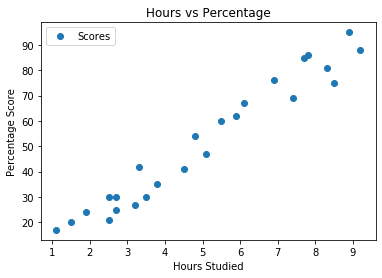

In [91]:
# Plotting the distribution of scores
df.plot( x='Hours', y='Scores',style='o') ;
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.title('Hours vs Percentage')  
plt.show()

### **Preparing and splitting the data into Training and Testing sets**

In [92]:
#dividing the data into "attributes" (inputs) and "labels" (outputs).
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

In [93]:
print(x)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


We'll use Scikit-Learn's built-in train_test_split() method to split our data:

In [94]:
from sklearn.model_selection import train_test_split  
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [95]:
x_train.shape, y_train.shape ,x_test.shape, y_test.shape

((20, 1), (20,), (5, 1), (5,))

In [96]:
print(x_train, y_train)


[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]] [35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]


### Using Simple  Linear regression model on training set

In [97]:
from sklearn.linear_model import LinearRegression
Linear_regressor = LinearRegression()
Linear_regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [98]:
print(Linear_regressor.coef_) #slope
print(Linear_regressor.intercept_) #intercept


[9.91065648]
2.018160041434683


In [99]:
# Plotting the regression line y = mx+c 
line = Linear_regressor.coef_*x+Linear_regressor.intercept_
line

array([[26.79480124],
       [52.56250809],
       [33.73226078],
       [86.25874013],
       [36.70545772],
       [16.88414476],
       [93.19619966],
       [56.52677068],
       [84.27660883],
       [28.77693254],
       [78.33021494],
       [60.49103328],
       [46.6161142 ],
       [34.72332643],
       [12.91988217],
       [90.22300272],
       [26.79480124],
       [20.84840735],
       [62.47316457],
       [75.357018  ],
       [28.77693254],
       [49.58931115],
       [39.67865467],
       [70.40168976],
       [79.32128059]])

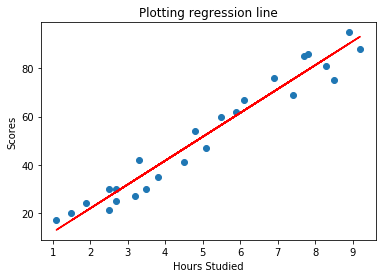

In [100]:
plt.scatter(x, y)
plt.plot(x, line, color='red')
plt.title('Plotting regression line')  
plt.xlabel('Hours Studied')  
plt.ylabel('Scores')
plt.show()

In [101]:
#predicting the scores
pred = Linear_regressor.predict(x_test) 
print(pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


### Comparing actual and predicted values

In [102]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': pred})  
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [103]:
Linear_regressor.score(x_test,y_test)

0.9454906892105356

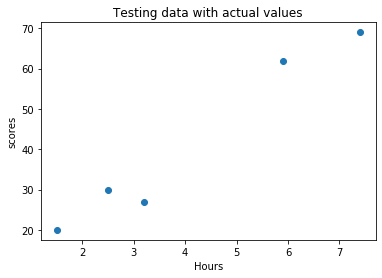

In [104]:
plt.scatter(x_test,y_test)
plt.title('Testing data with actual values')
plt.xlabel('Hours')
plt.ylabel('scores')
plt.show()

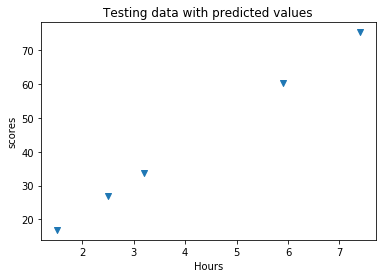

In [105]:
plt.scatter(x_test,pred,marker ='v')
plt.title('Testing data with predicted values')
plt.xlabel('Hours')
plt.ylabel('scores')
plt.show()

### Q: Predicted score if a student studies for 9.25 hrs/ day? 

In [106]:
pred_test = Linear_regressor.predict([[9.25]]) 
print("Predicted Score is {} for student studying for 9.25 hours".format(pred_test[0]))

Predicted Score is 93.69173248737538 for student studying for 9.25 hours


### Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [107]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred)) 
print('Mean squared Error:', metrics.mean_squared_error(y_test,pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,pred)))

Mean Absolute Error: 4.183859899002975
Mean squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
